In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
import os

In [86]:
def make_pdarray(columns,textfile):
	x = np.loadtxt(textfile, comments='#', unpack=True)
	array = {}
	if len(x) == len(columns):
		for i,j in enumerate(columns):
			array[j] = x[i]
	return pd.DataFrame(array)
def make_plot_limits_tran(sens,n_degr):
	return np.array(sens),(np.array(sens)**1.5)*(n_degr/0.00030461742)

zotti = pd.read_csv('Zotti+10_counts.csv')
vernstrom = make_pdarray(['log(S)','ncts','+','-'],'Data_Vernstrom2016_1.4GHz.txt')
Smolcic = make_pdarray(['log(S)','ncts','+','-'],'Data_Smolcic2017_1.4GHz.txt')
padovani = make_pdarray(['log(S)','ncts','+','-'],'Data_Padovani2015_1.4GHz.txt')
bondi = make_pdarray(['log(S)','ncts','+','-'],'Data_Bondi2008_1.4GHz.txt')
deane = pd.read_csv('Data_deane_2024.csv')
deane['log(S)'] = np.log10(deane['log(S)']/1e6)

number_counts = {}
TRECS_Source_counts = make_pdarray(['log(S)','ncts','+','-'],'TRECS_AGN_SFG_I_Source_Counts.txt')
TRECS_BLLAC = make_pdarray(['log(S)','ncts','+','-'],'TRECS_AGN_I_Source_Counts_BLLac.txt')

In [87]:
deane

,log(S),ncts,-,+
0,-4.119186,0.56,0.24,0.38
1,-3.913640,0.88,0.42,0.70
2,-3.769551,3.03,1.20,1.81
3,-3.630784,1.54,0.61,0.92
4,-3.238824,2.69,1.74,3.55
5,-2.486782,15.12,12.50,34.77


In [12]:
vlbi_smbh_data = pd.DataFrame({'survey':['GOODS-N','COSMOS','COSMOS','SPARCS-N'],
                               'peak':[70.4,1136,1113,282],
                               'integrated':[150.2,2016,1638,342]})

In [79]:
deg = (4+2*((0.25**2) * np.pi))*(u.deg**2)
sr = deg.to(u.sr).value
2/deg

<Quantity 0.45530094 1 / deg2>

In [66]:
ns, b_edge = np.histogram(vlbi_smbh_data['integrated']/1e6,bins=2,)
n_err = np.sqrt(ns)
ns = ns/sr
n_err = n_err/sr
x_err = []
diff_n = []
f_c = []
for i in range(len(ns)):
	f_c.append((b_edge[i] + b_edge[i+1])/2.)
	f_temp = (b_edge[i] + b_edge[i+1])/2.
	x_err.append([np.abs(f_temp-b_edge[i]),np.abs(f_temp-b_edge[i+1])])
	diff_n.append((f_temp**(1.5))*ns[i])
diff_n = np.array(diff_n)
f_c = np.array(f_c)
diff_n_err = n_err*(f_c**1.5)

In [78]:
dn = pd.DataFrame({"N":[2,2],"N_sr":ns,"S_c":f_c,"Sdn_ds":diff_n,'Sdn_err':diff_n_err})
dn.to_latex('tabulated_bsmbh_counts.tex')

<>:40: SyntaxWarning: invalid escape sequence '\,'
<>:40: SyntaxWarning: invalid escape sequence '\,'
/var/folders/0f/ksrbwvrs3fb4zx5hqxpm3hnr0000gq/T/ipykernel_26677/1984206923.py:40: SyntaxWarning: invalid escape sequence '\,'
  ax.text(x,0.08,s='$%s\,\mathrm{deg^{-2}}$'%lab,rotation=50,ha='left',va='bottom',size=12)
/var/folders/0f/ksrbwvrs3fb4zx5hqxpm3hnr0000gq/T/ipykernel_26677/1984206923.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(x=10**zotti['log(S)'][zotti.ref ==references[i]],y=zotti['ncts'][zotti.ref ==references[i]],\


1
10
100
1000


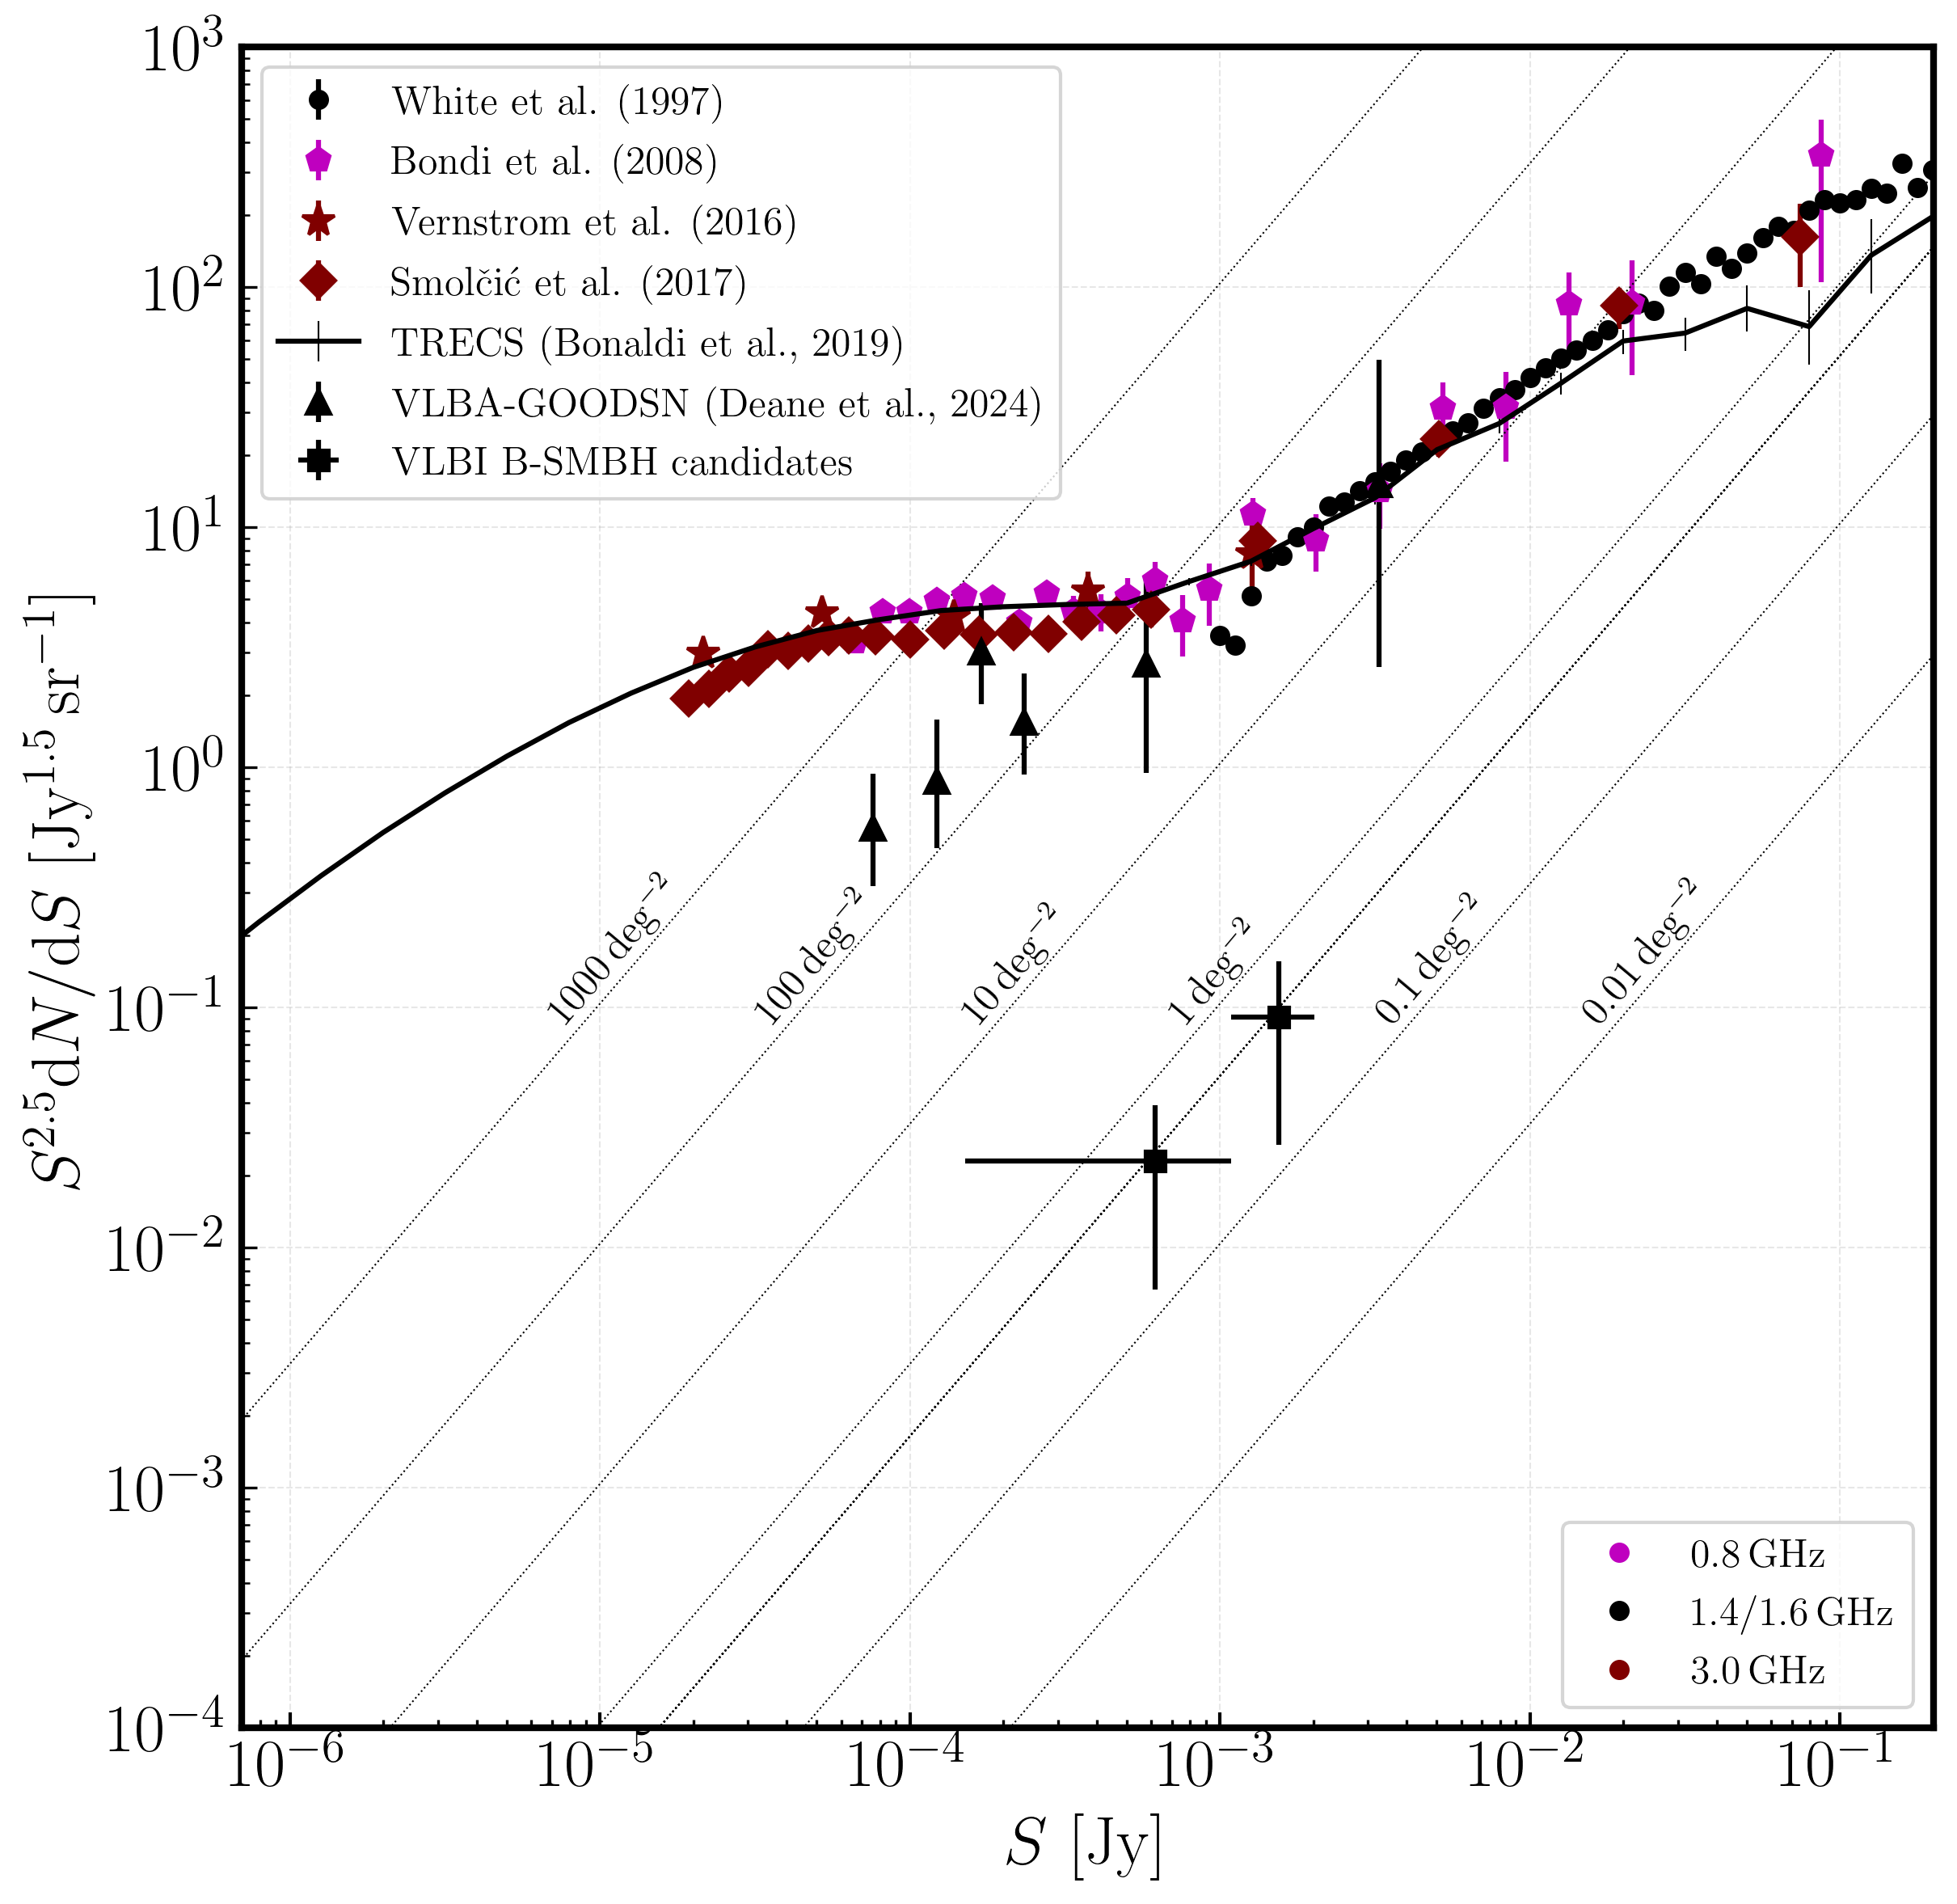

In [102]:
fig = plt.figure(1,figsize=(9,9))
ax = fig.add_subplot(111)
references = {'White et al. (1997)':'wi97'}
colors = ['k','b','m','r']
markers = ['o','s','^','s']
size = [5,5,7,7]
for j,i in enumerate(references.keys()):
	ax.errorbar(x=10**zotti['log(S)'][zotti.ref ==references[i]],y=zotti['ncts'][zotti.ref ==references[i]],\
			yerr=[zotti['-'][zotti.ref ==references[i]].astype(float),zotti['+'][zotti.ref ==references[i]].astype(float)],\
				fmt='o',markersize=size[j],label=r'%s'%i,color=colors[j],marker=markers[j])
	
ax.errorbar(x=10**bondi['log(S)'],y=bondi['ncts'],\
			yerr=[bondi['-'].astype(float),bondi['+'].astype(float)],\
				fmt='p',markersize=7,label=r'Bondi et al. (2008)',color='m')
ax.errorbar(x=10**vernstrom['log(S)'].values,y=vernstrom['ncts'].values.astype(float),\
			yerr=[vernstrom['-'].values.astype(float),vernstrom['+'].values.astype(float)],\
				fmt='*',markersize=10,label=r'Vernstrom et al. (2016)',color='maroon')
ax.errorbar(x=10**Smolcic['log(S)'],y=Smolcic['ncts'],\
			yerr=[Smolcic['-'].astype(float),Smolcic['+'].astype(float)],\
				fmt='D',markersize=7,label=r'Smol\v{c}i\'{c} et al. (2017)',color='maroon')


ax.errorbar(x=10**TRECS_Source_counts['log(S)'],y=TRECS_Source_counts['ncts'],\
			yerr=[TRECS_Source_counts['-'].astype(float),TRECS_Source_counts['+'].astype(float)],\
				fmt='-',markersize=7,label=r'TRECS (Bonaldi et al., 2019)',color='k',elinewidth=0.5)

ax.errorbar(x=10**deane['log(S)'],y=deane['ncts'],\
			yerr=[deane['-'].astype(float),deane['+'].astype(float)],\
				fmt='^',markersize=7,label=r'VLBA-GOODSN (Deane et al., 2024)',color='k')

for i in np.logspace(-2,3,6,endpoint=True):
	ax.plot(make_plot_limits_tran([1e-8,1],i)[0],make_plot_limits_tran([1e-8,1],i)[1],c='k',ls=':',lw=0.5)
	ax.plot(make_plot_limits_tran([1e-8,1],0.5)[0],make_plot_limits_tran([1e-8,1],0.5)[1],c='k',ls=':',lw=0.5)
	x = 10**(np.log10((0.45e-1/(i/0.00030461742))**(2/3)) - np.log10(0.88))
	if i > 0.9:
		lab = int(np.rint(i))
		print(lab)
	else:
		lab = i
	ax.text(x,0.08,s='$%s\,\mathrm{deg^{-2}}$'%lab,rotation=50,ha='left',va='bottom',size=12)

ax.errorbar(f_c,diff_n,yerr=diff_n_err,xerr=x_err,marker='s',linestyle='',c='k',label='VLBI B-SMBH candidates')


ax.set_yscale('log')
ax.set_ylabel(r'$S^{2.5}\mathrm{d}N/\mathrm{d}S$ [$\mathrm{Jy^{1.5}\,sr^{-1}}$]')
ax.set_xlabel(r'$S$ [$\mathrm{Jy}$]')
ax.set_xlim(7e-7,2e-1)
ax.set_ylim(1e-4,1000)
ax.set_xscale('log')
leg1 = ax.legend(fancybox=True,frameon=True,fontsize=12)
plt.gca().add_artist(leg1)

from matplotlib.lines import Line2D
ms = 5
legend_elements = [Line2D([0], [0], marker='o', color='none', label=r'0.8\,GHz',
						  markerfacecolor='m',markeredgecolor='m', markersize=ms),
				   Line2D([0], [0], marker='o', color='none', label=r'1.4/1.6\,GHz',
						  markerfacecolor='k',markeredgecolor='k', markersize=ms),
				   Line2D([0], [0], marker='o', color='none', label=r'3.0\,GHz',
						  markerfacecolor='maroon',markeredgecolor='maroon', markersize=ms)]
marker_colors = {'1.4':'k','3':'maroon','0.8':'m'}


# Create the figure
ax.legend(handles=legend_elements, loc=4,fancybox=True,frameon=True,fontsize=12)
fig.savefig('B-SMBH_number_counts.pdf',bbox_inches='tight')
plt.show()